# 导入必要包

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# 读入数据

         Date        High         Low        Open       Close     Volume  \
0  2010-01-04  129.226151  127.205109  129.226151  127.678436  5896979.0   
1  2010-01-05  128.850494  126.972198  128.467316  127.302780  4194404.0   
2  2010-01-06  127.347855  124.951164  126.964691  125.289253  5309229.0   
3  2010-01-07  125.612320  121.622841  125.289253  123.005257  6498680.0   
4  2010-01-08  123.215630  120.285500  123.215630  121.712997  4885048.0   

    Adj Close  
0  105.634399  
1  105.323608  
2  103.657715  
3  101.768059  
4  100.698906  


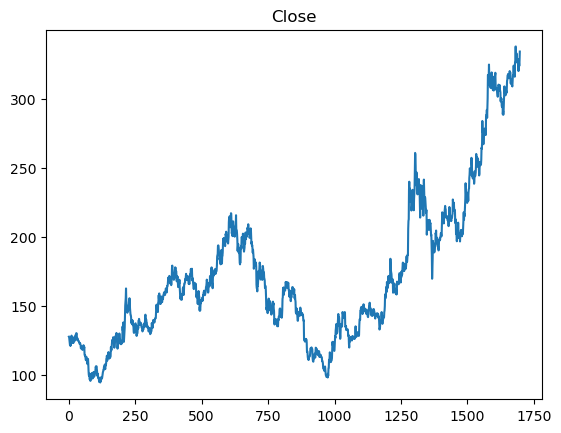

In [20]:
# 从CSV文件中读取数据，文件路径是'E:\毕设文件\DeepLearning\Time_Series\data\experiment_01\data-stock_train.csv'
data = pd.read_csv('E:\毕设文件\DeepLearning\Time_Series\data\experiment_01\data-stock_train.csv')

# 打印数据的前几行，以查看数据的结构
print(data.head())

# 从数据中选择以下列进行分析
data = data[[
    'High',        # 最高价格
    'Low',         # 最低价格
    'Open',        # 开盘价格
    'Close',       # 收盘价格
    'Volume',      # 交易量
    'Adj Close'   # 调整后的收盘价格
]]

# 将所选列的数据类型转换为浮点型，以便进行数值计算和绘图
data = data.astype(float)

# 绘制收盘价格的折线图
plt.plot(data['Close'])
plt.title('Close')  # 设置图表标题
plt.show()  # 显示图表


# 对数据进行预处理填充0数据的同时取除Na数据

            High         Low        Open       Close     Volume   Adj Close
4     123.215630  120.285500  123.215630  121.712997  4885048.0  100.698906
5     123.891808  120.586021  122.915100  121.179565  3255763.0  100.257576
6     124.845978  120.668671  121.299774  124.455299  4134538.0  102.967743
7     124.079636  120.961685  123.208115  121.292259  5047742.0  100.350800
8     127.122467  121.712997  121.712997  126.626595  6183112.0  104.764153
...          ...         ...         ...         ...        ...         ...
1693  324.989990  316.200012  319.029999  324.480011  2600143.0  306.992828
1694  328.799988  323.500000  324.510010  326.160004  2006229.0  308.582214
1695  328.000000  323.329987  326.989990  323.720001  1787811.0  306.273712
1696  327.869995  323.000000  324.000000  327.309998  2122512.0  309.670227
1697  335.290009  326.609985  326.609985  334.149994  3468767.0  316.141602

[1694 rows x 6 columns]


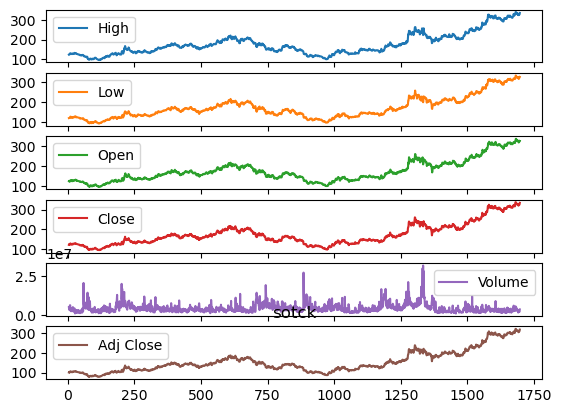

In [21]:
# 由于前4条数据特征全部为0，因此舍弃这些数据，进行切片操作
data = data.iloc[4:]

# 对数据进行0填充，使用前一行的非0值来填充0值
data = data.mask(data == 0).fillna(method='ffill')

# 打印处理后的数据
print(data)

# 选择要绘制的数据列
draw_data = data[[
    'High',        # 最高价格
    'Low',         # 最低价格
    'Open',        # 开盘价格
    'Close',       # 收盘价格
    'Volume',      # 交易量
    'Adj Close'   # 调整后的收盘价格
]]

# 绘制每个特征的子图
draw_data.plot(subplots=True)

# 设置图表标题
plt.title('sotck')

# 保存图表为文件
plt.savefig('stocks.png')

# 显示图表
plt.show()


# 模型平稳性评估
显然我们可以看到上述图标中 时间序列并不是平稳的，接下来对时间序列的数据进行平稳性分析
本实验以High值进行时间序列预测

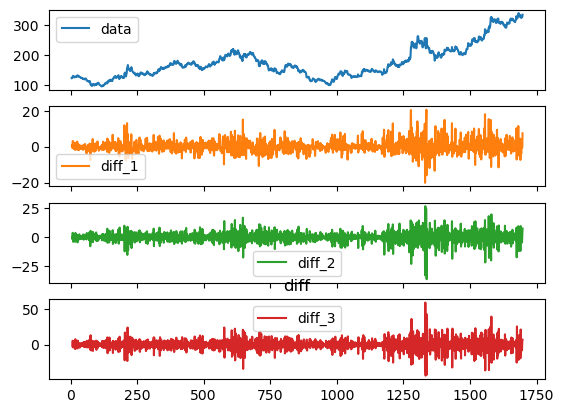

,High,Low,Open,Close,Volume,Adj Close,data,diff_1,diff_2,diff_3
4,123.215630,120.285500,123.215630,121.712997,4885048.0,100.698906,123.215630,NaN,NaN,NaN
5,123.891808,120.586021,122.915100,121.179565,3255763.0,100.257576,123.891808,0.676178,NaN,NaN
6,124.845978,120.668671,121.299774,124.455299,4134538.0,102.967743,124.845978,0.954170,0.277992,NaN
7,124.079636,120.961685,123.208115,121.292259,5047742.0,100.350800,124.079636,-0.766342,-1.720512,-1.998505
8,127.122467,121.712997,121.712997,126.626595,6183112.0,104.764153,127.122467,3.042831,3.809174,5.529686
...,...,...,...,...,...,...,...,...,...,...
1693,324.989990,316.200012,319.029999,324.480011,2600143.0,306.992828,324.989990,0.489990,4.449982,7.579956
1694,328.799988,323.500000,324.510010,326.160004,2006229.0,308.582214,328.799988,3.809998,3.320007,-1.129974
1695,328.000000,323.329987,326.989990,323.720001,1787811.0,306.273712,328.000000,-0.799988,-4.609985,-7.929993
1696,327.869995,323.000000,324.000000,327.309998,2122512.0,309.670227,327.869995,-0.130005,0.669983,5.279968


In [22]:
# 新增列对数据进行差分处理

# 创建一个名为'data'的新列，将其值设置为'High'列的值
data['data'] =  data['High']

# 创建一个名为'diff_1'的新列，计算'data'列的一阶差分
data['diff_1'] = data['data'].diff(1)

# 创建一个名为'diff_2'的新列，计算'diff_1'列的一阶差分，即二阶差分
data['diff_2'] = data['diff_1'].diff(1)

# 创建一个名为'diff_3'的新列，计算'diff_2'列的一阶差分，即三阶差分
data['diff_3'] = data['diff_2'].diff(1)

# 绘制'data'、'diff_1'、'diff_2'和'diff_3'列的子图，以观察数据的差分情况
draw_data = data[[
    'data',    # 原始数据
    'diff_1',  # 一阶差分
    'diff_2',  # 二阶差分
    'diff_3'   # 三阶差分
]]
draw_data.plot(subplots=True)

# 设置图表标题
plt.title('diff')

# 保存图表为文件
plt.savefig('diff.png')

# 显示图表
plt.show()

# 打印处理后的数据，包括原始数据和差分列
data

# 差分分析
通过差分操作我们可以看到随着差分次数的提升模型的平稳性得到了显著的提升
在经过第三次差分后，数据平稳性显著下降

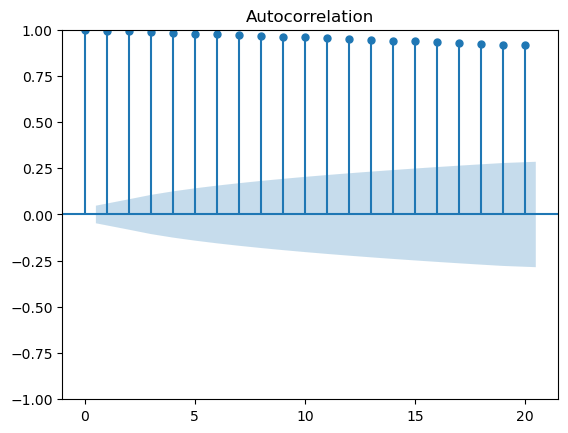

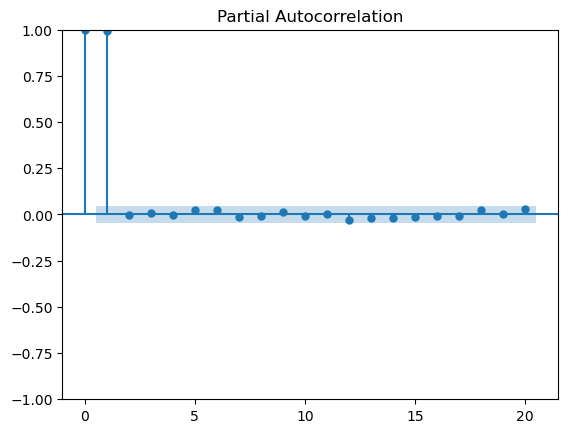

原始数据:       lb_stat  lb_pvalue
1  1680.69599        0.0


In [23]:
# 绘制原始数据的自相关函数（ACF）和偏自相关函数（PACF）图，最大滞后阶数为20
plot_acf(data['data'].iloc[1:], lags=20)
plot_pacf(data['data'].iloc[1:], lags=20)
plt.show()

# 打印原始数据的白噪声检验结果
print('原始数据:', acorr_ljungbox(data['data'].iloc[1:], lags=1))

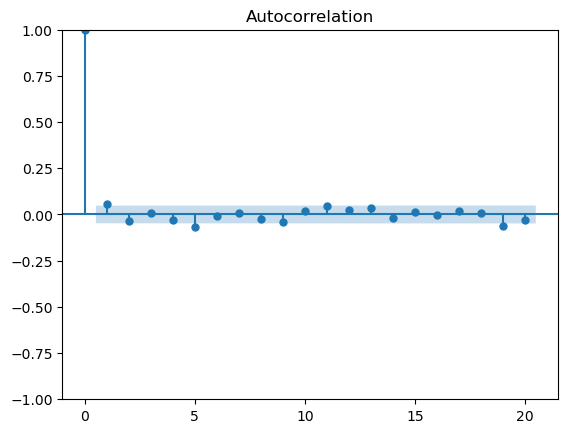

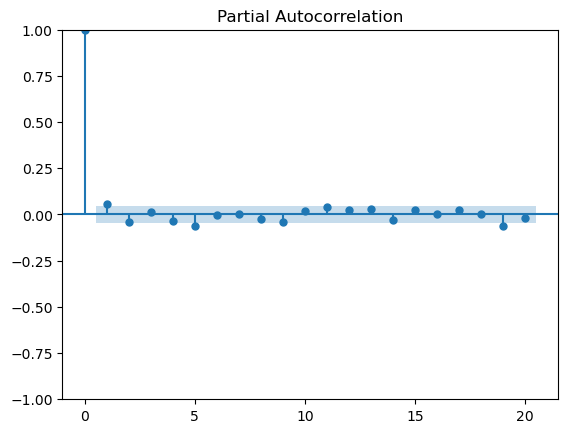

一阶差分:     lb_stat  lb_pvalue
1  5.872401    0.01538


In [24]:


# 绘制一阶差分数据的自相关函数（ACF）和偏自相关函数（PACF）图，最大滞后阶数为20
plot_acf(data['diff_1'].iloc[1:], lags=20)
plot_pacf(data['diff_1'].iloc[1:], lags=20)
plt.show()
# 打印一阶差分数据的白噪声检验结果
print('一阶差分:', acorr_ljungbox(data['diff_1'].iloc[1:], lags=1))


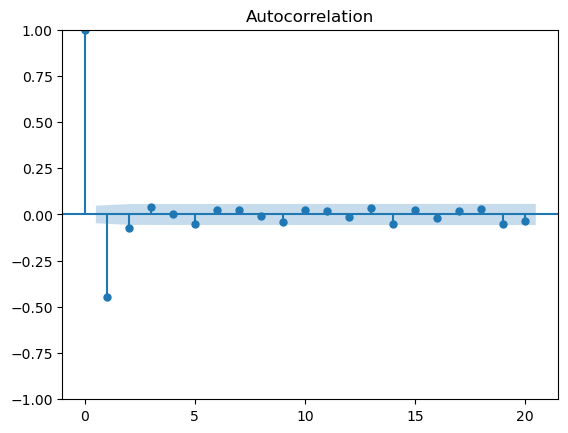

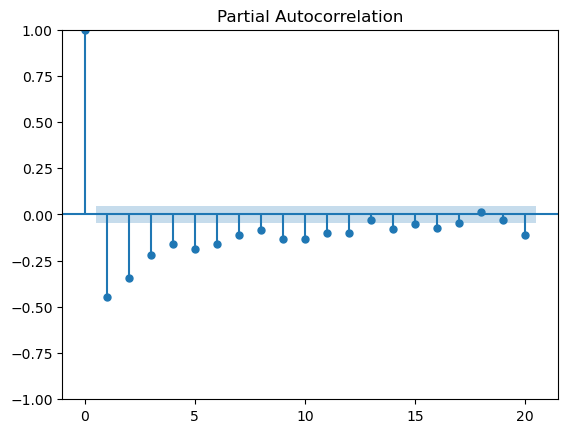

二阶差分:       lb_stat     lb_pvalue
1  341.529226  2.963703e-76


In [25]:

# 绘制二阶差分数据的自相关函数（ACF）和偏自相关函数（PACF）图，最大滞后阶数为20
plot_acf(data['diff_2'].iloc[2:], lags=20)
plot_pacf(data['diff_2'].iloc[2:], lags=20)
plt.show()

# 打印二阶差分数据的白噪声检验结果
print('二阶差分:', acorr_ljungbox(data['diff_2'].iloc[2:], lags=1))


# 结果分析
原始数据 acf 缓慢拖尾 pacf2阶截尾  参数选择应当为p = 1 q=2
1阶差分 acf 1阶截尾  pacf1阶截尾  参数选择应当为p = 1 q=1
2阶差分 acf 2阶截尾 pacf缓慢拖尾  参数选择应当为p = 2 q=1


且数据p<0.05 均为非白噪声序列

2255.6403833175327


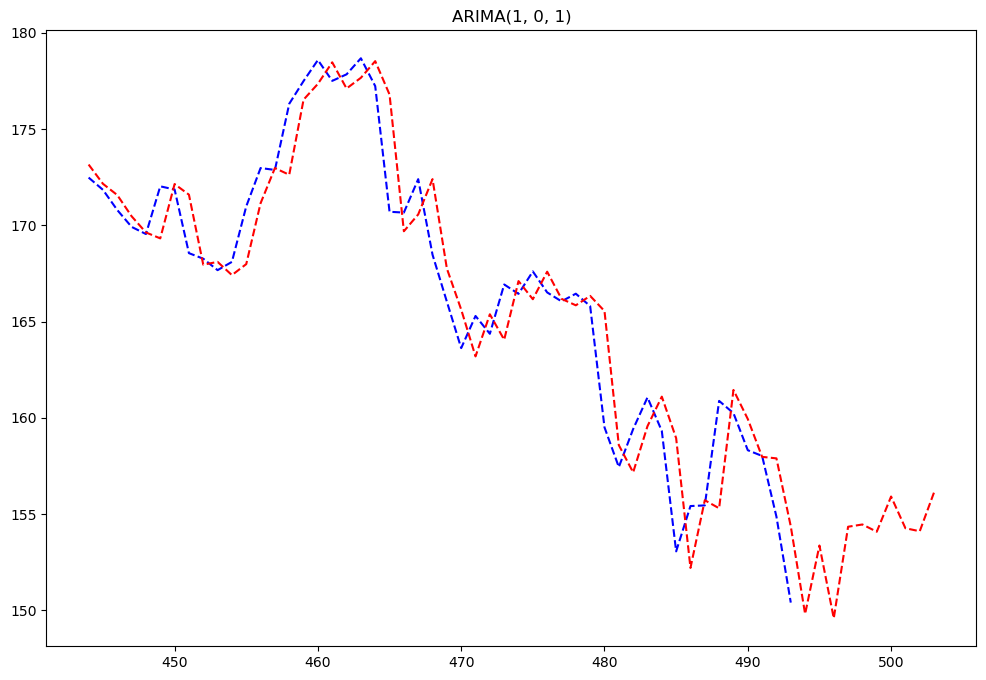

C:\Users\zx131\AppData\Local\Temp\ipykernel_22296\1196892591.py:15: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  arma_obj = sm.tsa.arima.ARIMA(data_df.High, order=(ari, d, maj)).fit(method='innovations_mle')


2246.4353265633226


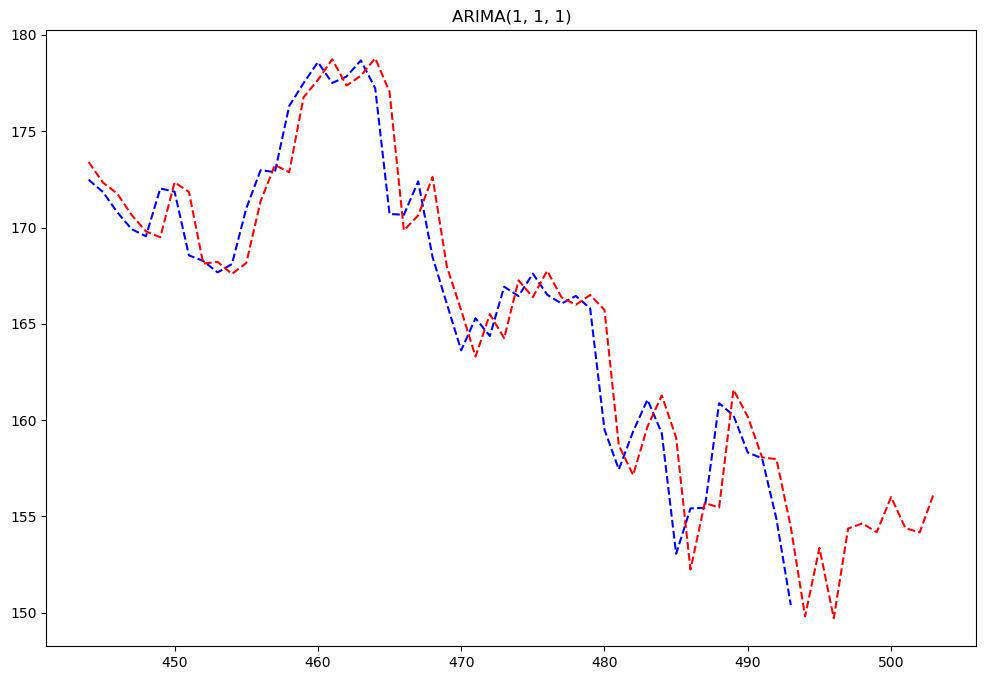

C:\Users\zx131\AppData\Local\Temp\ipykernel_22296\1196892591.py:15: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  arma_obj = sm.tsa.arima.ARIMA(data_df.High, order=(ari, d, maj)).fit(method='innovations_mle')


2248.5948484807873


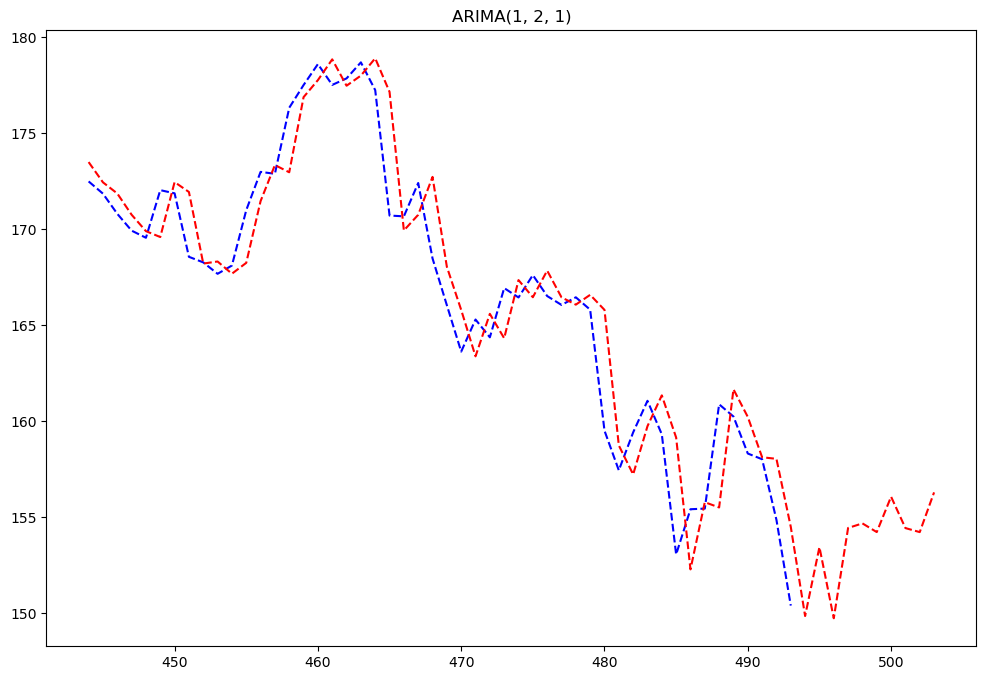

C:\Users\zx131\AppData\Local\Temp\ipykernel_22296\1196892591.py:15: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  arma_obj = sm.tsa.arima.ARIMA(data_df.High, order=(ari, d, maj)).fit(method='innovations_mle')


2423.594742129453


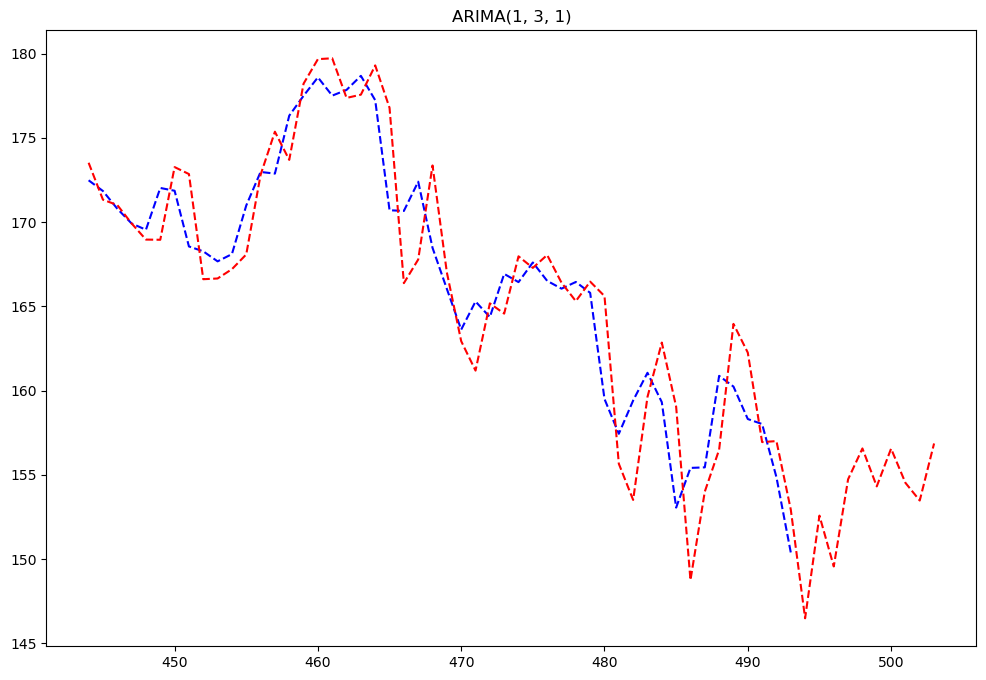

C:\Users\zx131\AppData\Local\Temp\ipykernel_22296\1196892591.py:15: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  arma_obj = sm.tsa.arima.ARIMA(data_df.High, order=(ari, d, maj)).fit(method='innovations_mle')


2789.4174002081263


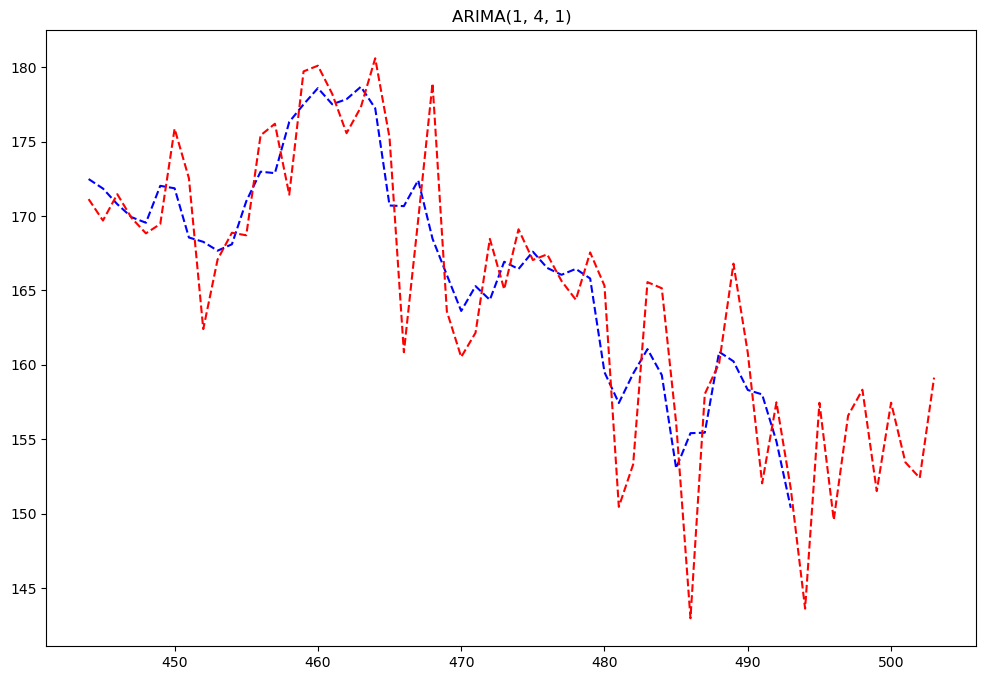

2257.3054515192453


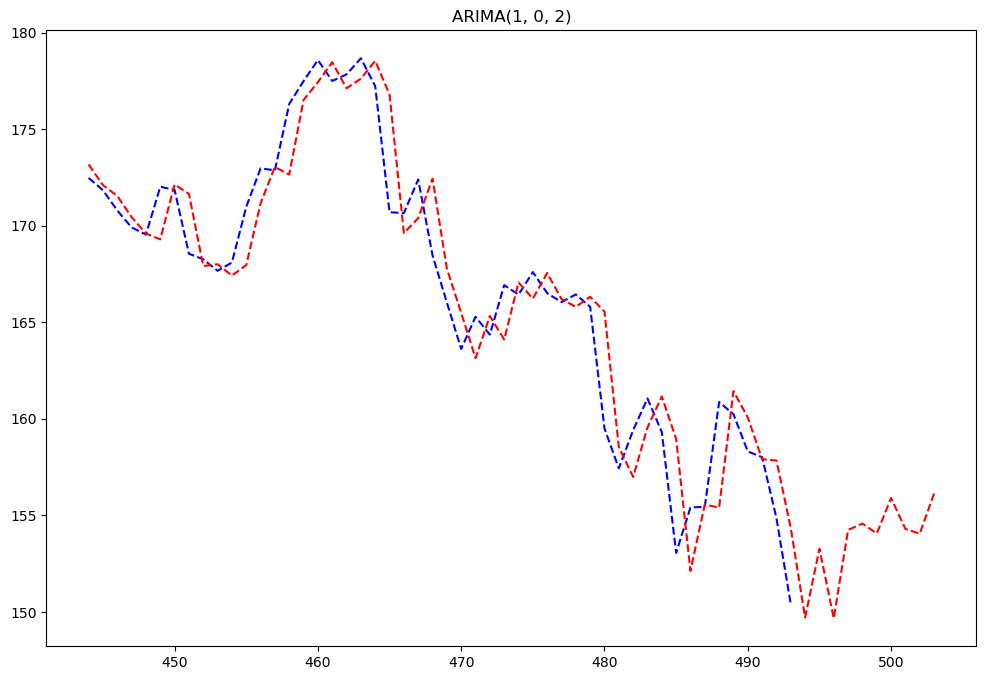

C:\Users\zx131\AppData\Local\Temp\ipykernel_22296\1196892591.py:15: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  arma_obj = sm.tsa.arima.ARIMA(data_df.High, order=(ari, d, maj)).fit(method='innovations_mle')


2248.4082909242456


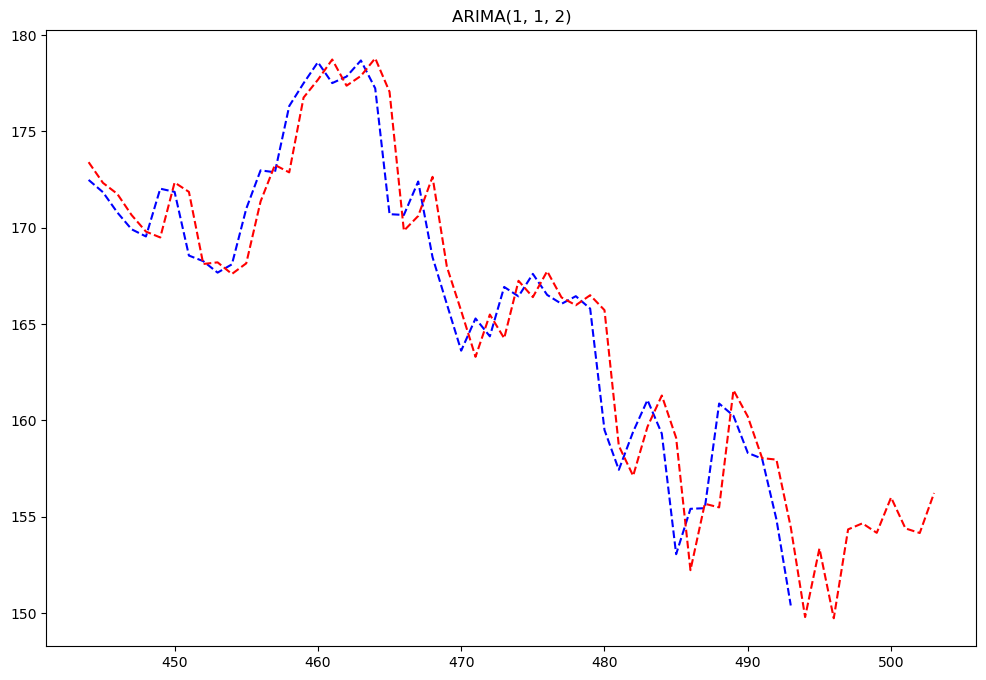

C:\Users\zx131\AppData\Local\Temp\ipykernel_22296\1196892591.py:15: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  arma_obj = sm.tsa.arima.ARIMA(data_df.High, order=(ari, d, maj)).fit(method='innovations_mle')


2250.582928505406


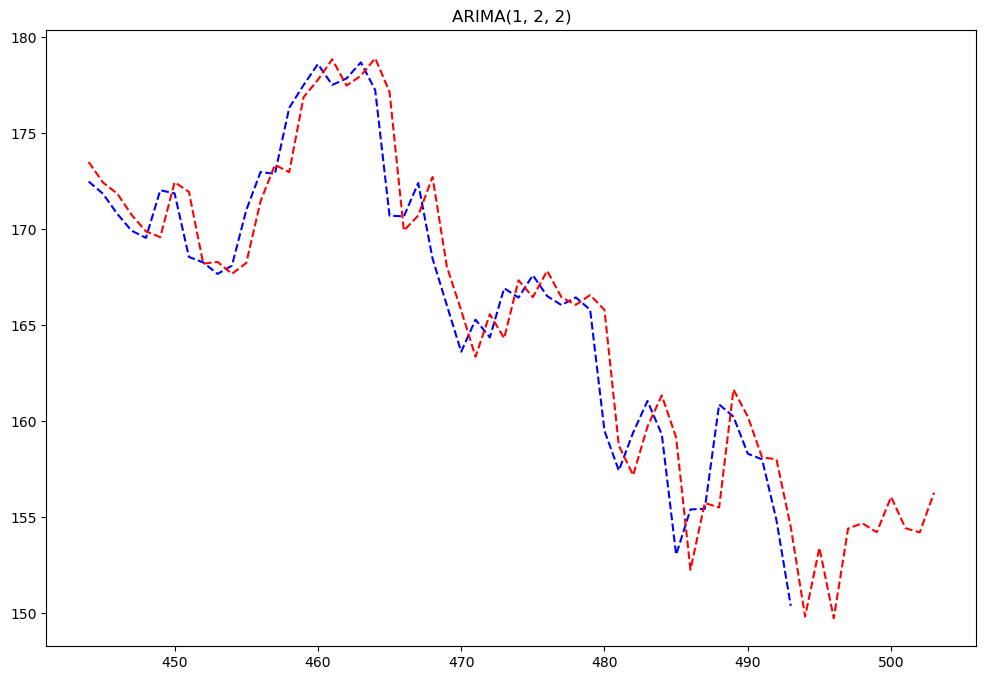

C:\Users\zx131\AppData\Local\Temp\ipykernel_22296\1196892591.py:15: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  arma_obj = sm.tsa.arima.ARIMA(data_df.High, order=(ari, d, maj)).fit(method='innovations_mle')


2270.7787960653113


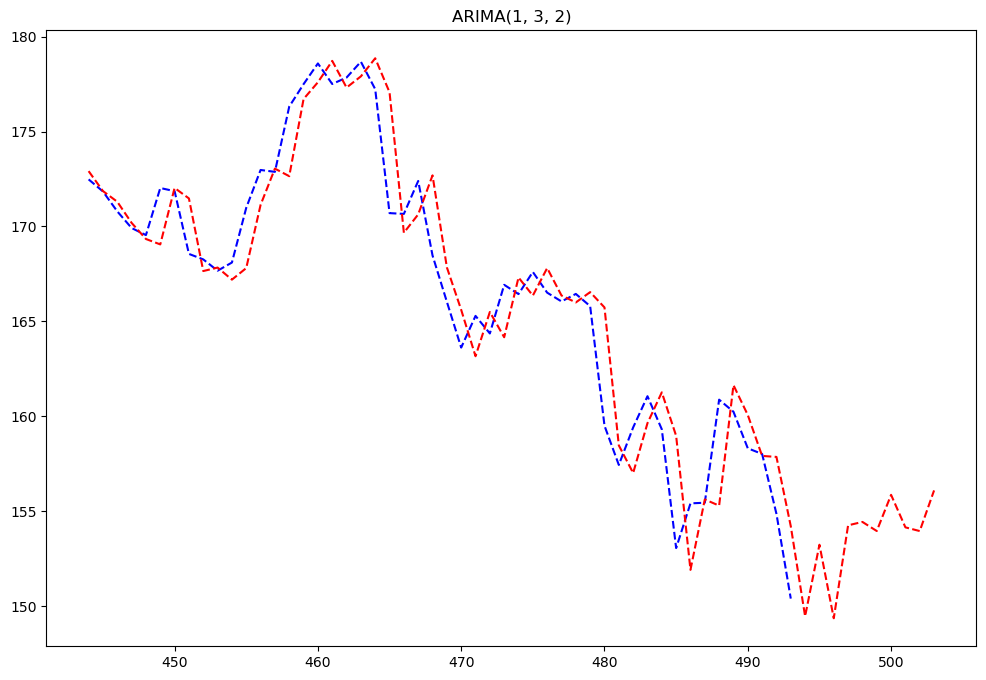

C:\Users\zx131\AppData\Local\Temp\ipykernel_22296\1196892591.py:15: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  arma_obj = sm.tsa.arima.ARIMA(data_df.High, order=(ari, d, maj)).fit(method='innovations_mle')


2449.1923439940356


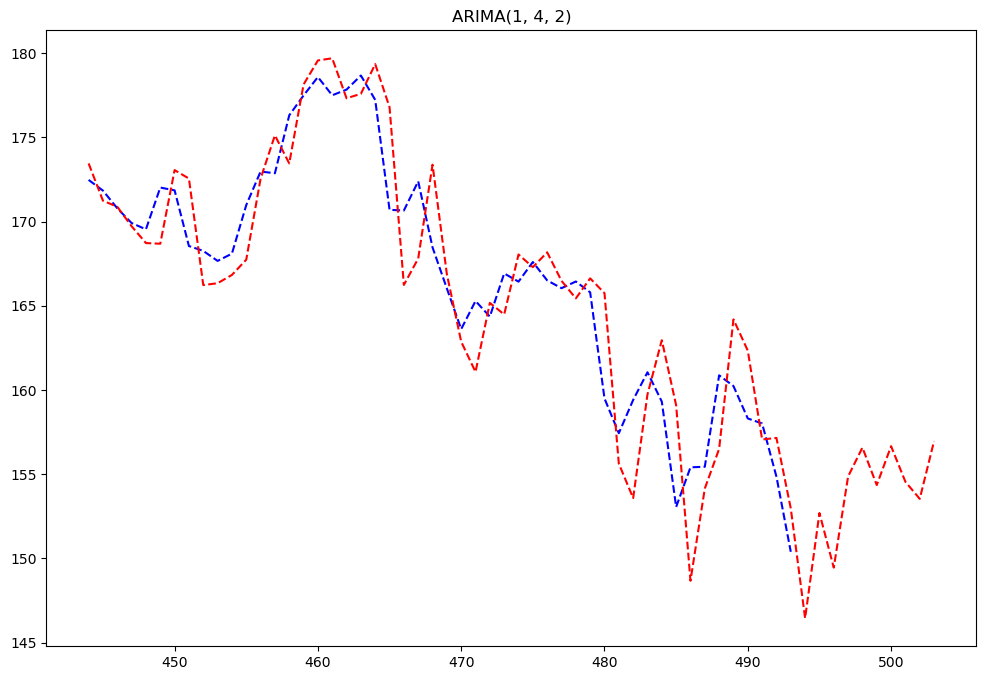

2257.323189406816


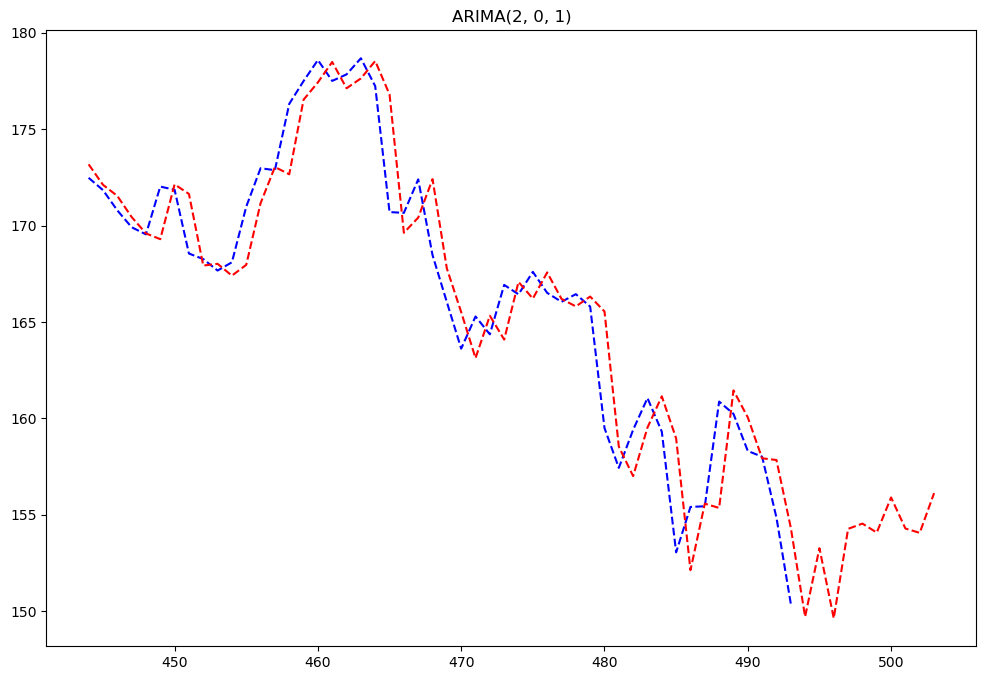

C:\Users\zx131\AppData\Local\Temp\ipykernel_22296\1196892591.py:15: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  arma_obj = sm.tsa.arima.ARIMA(data_df.High, order=(ari, d, maj)).fit(method='innovations_mle')


2248.4291678139152


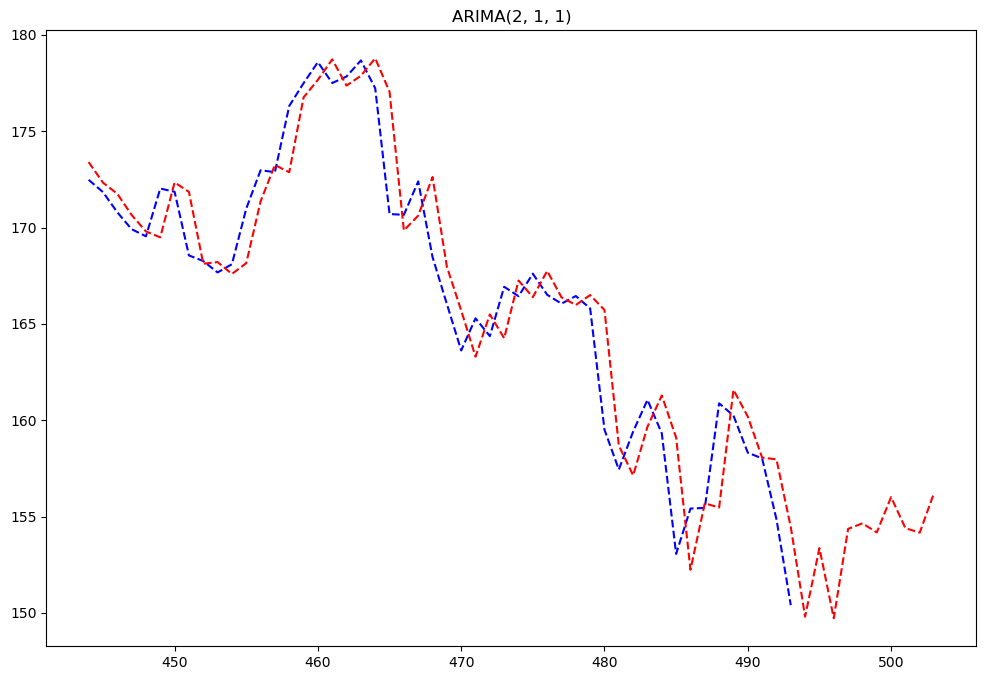

C:\Users\zx131\AppData\Local\Temp\ipykernel_22296\1196892591.py:15: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  arma_obj = sm.tsa.arima.ARIMA(data_df.High, order=(ari, d, maj)).fit(method='innovations_mle')


2250.5753542458497


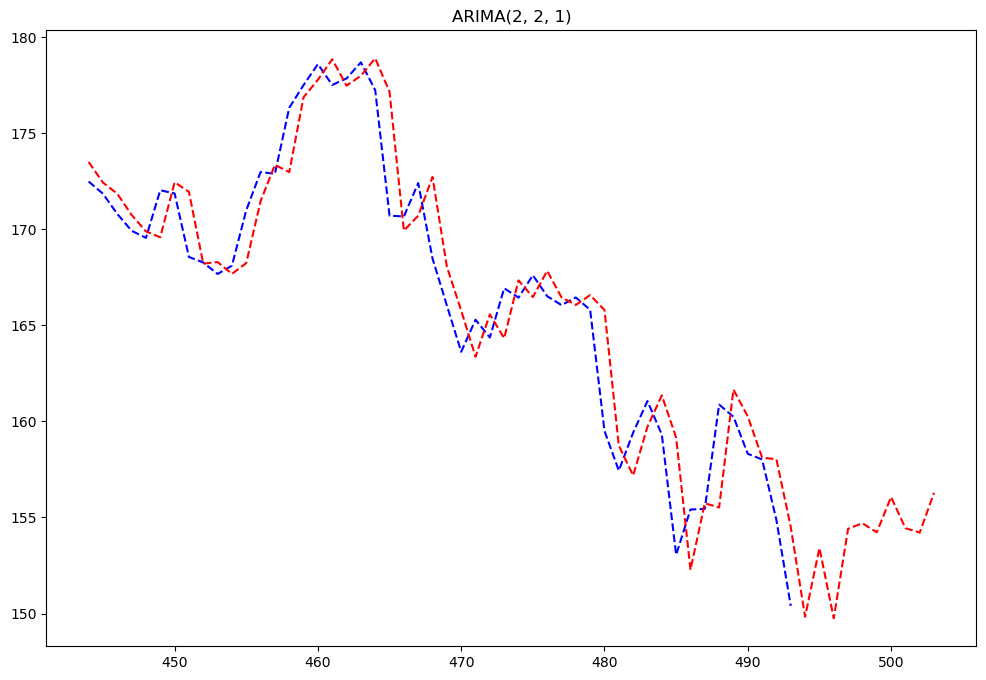

C:\Users\zx131\AppData\Local\Temp\ipykernel_22296\1196892591.py:15: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  arma_obj = sm.tsa.arima.ARIMA(data_df.High, order=(ari, d, maj)).fit(method='innovations_mle')


2382.23489491031


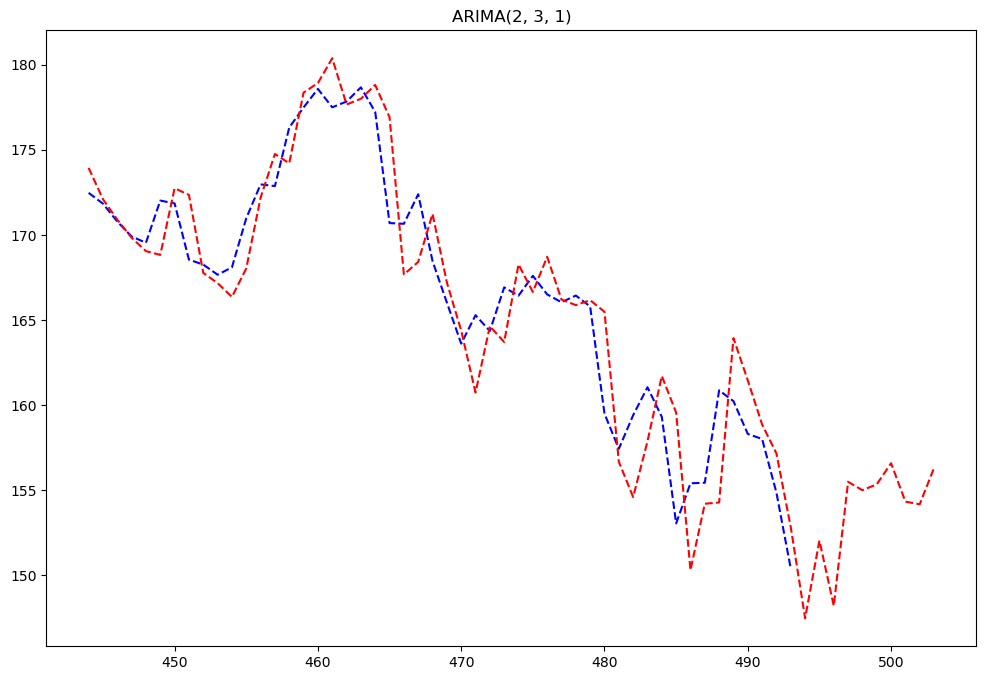

C:\Users\zx131\AppData\Local\Temp\ipykernel_22296\1196892591.py:15: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  arma_obj = sm.tsa.arima.ARIMA(data_df.High, order=(ari, d, maj)).fit(method='innovations_mle')


2658.666115704161


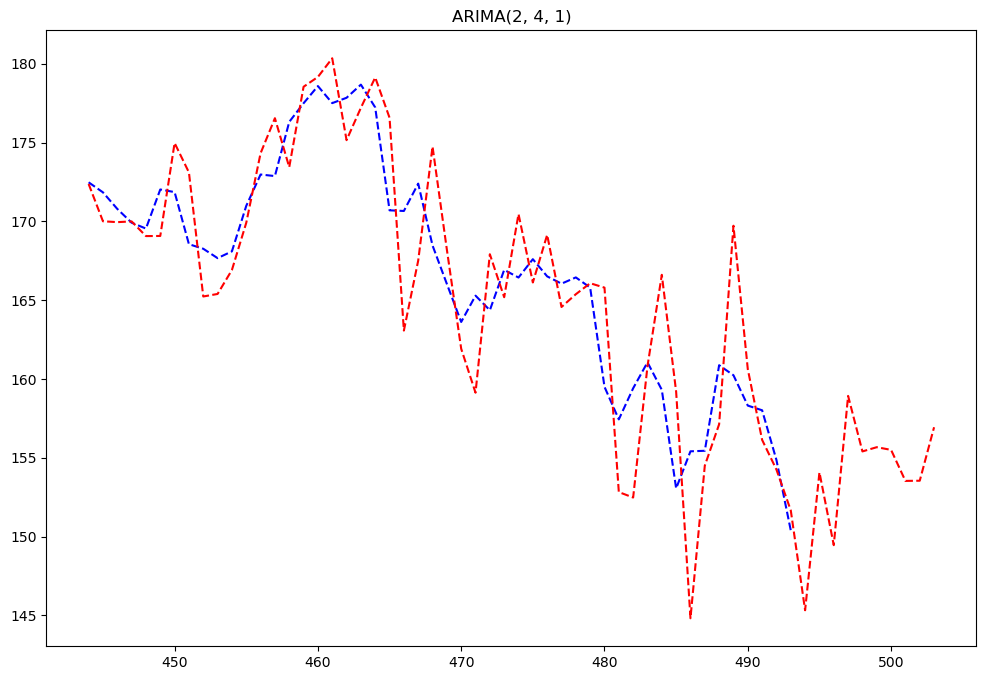

2259.2930358787244


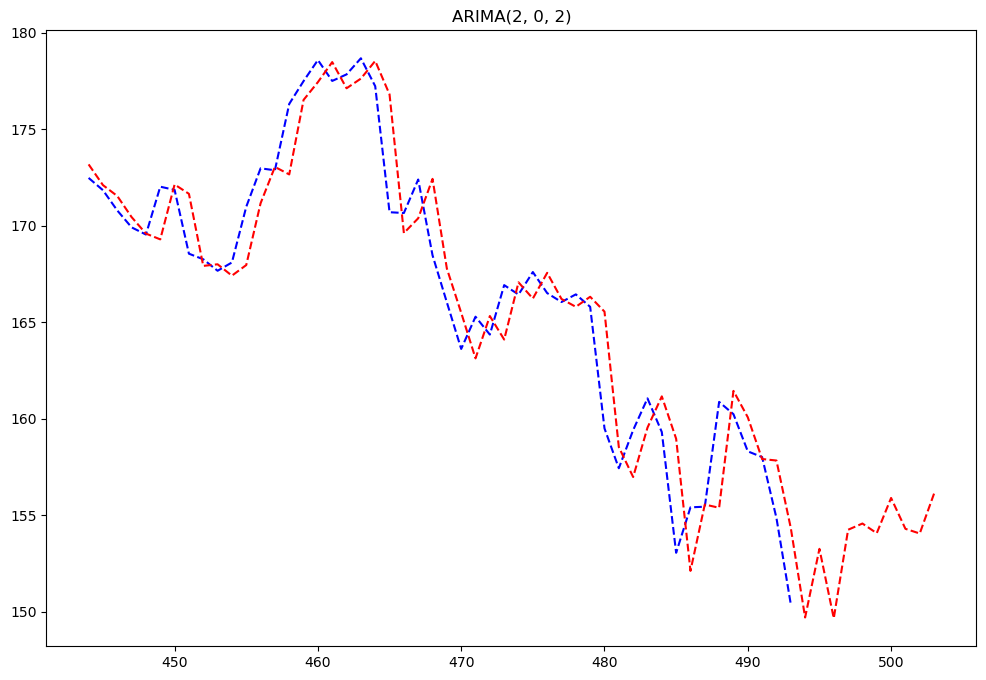

C:\Users\zx131\AppData\Local\Temp\ipykernel_22296\1196892591.py:15: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  arma_obj = sm.tsa.arima.ARIMA(data_df.High, order=(ari, d, maj)).fit(method='innovations_mle')


2232.2868671941624


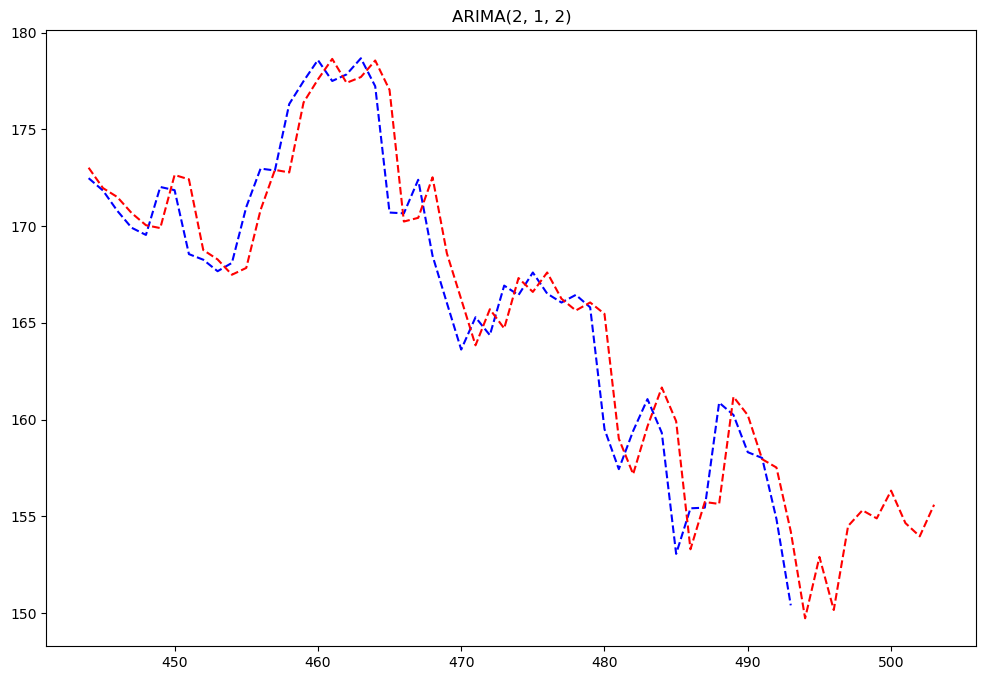

C:\Users\zx131\AppData\Local\Temp\ipykernel_22296\1196892591.py:15: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  arma_obj = sm.tsa.arima.ARIMA(data_df.High, order=(ari, d, maj)).fit(method='innovations_mle')


2247.8710994033363


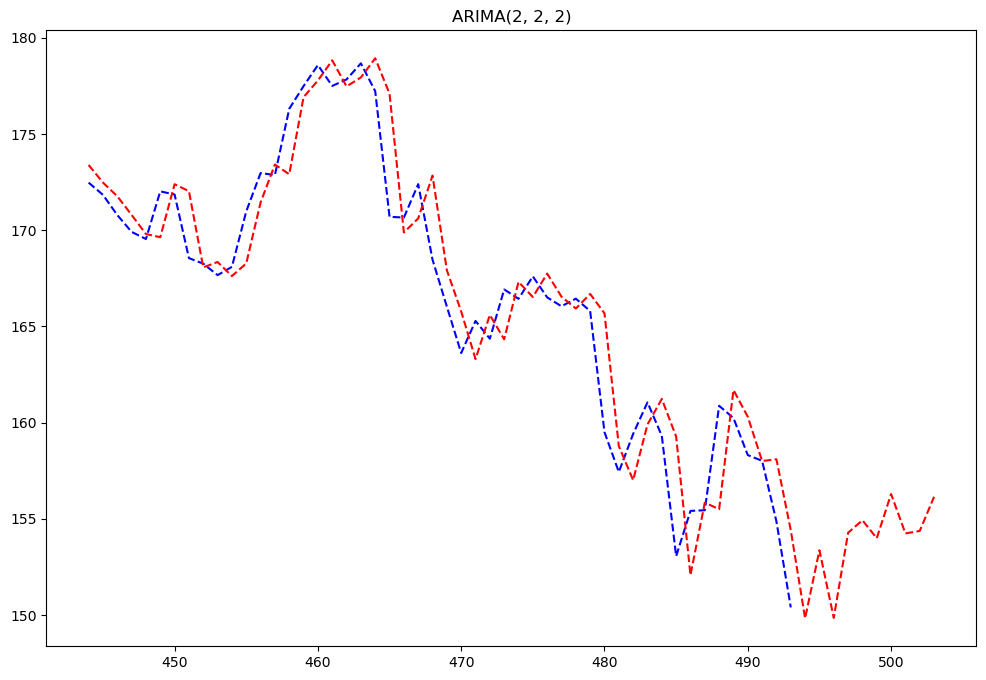

C:\Users\zx131\AppData\Local\Temp\ipykernel_22296\1196892591.py:15: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  arma_obj = sm.tsa.arima.ARIMA(data_df.High, order=(ari, d, maj)).fit(method='innovations_mle')


2272.2076309413333


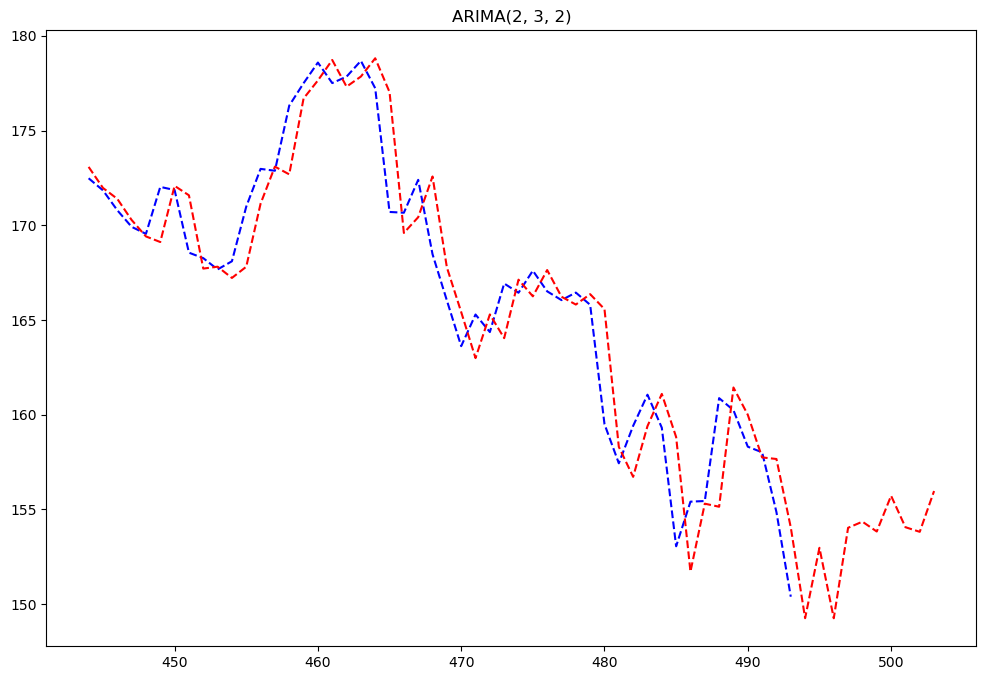

C:\Users\zx131\AppData\Local\Temp\ipykernel_22296\1196892591.py:15: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  arma_obj = sm.tsa.arima.ARIMA(data_df.High, order=(ari, d, maj)).fit(method='innovations_mle')


2415.3339243891955


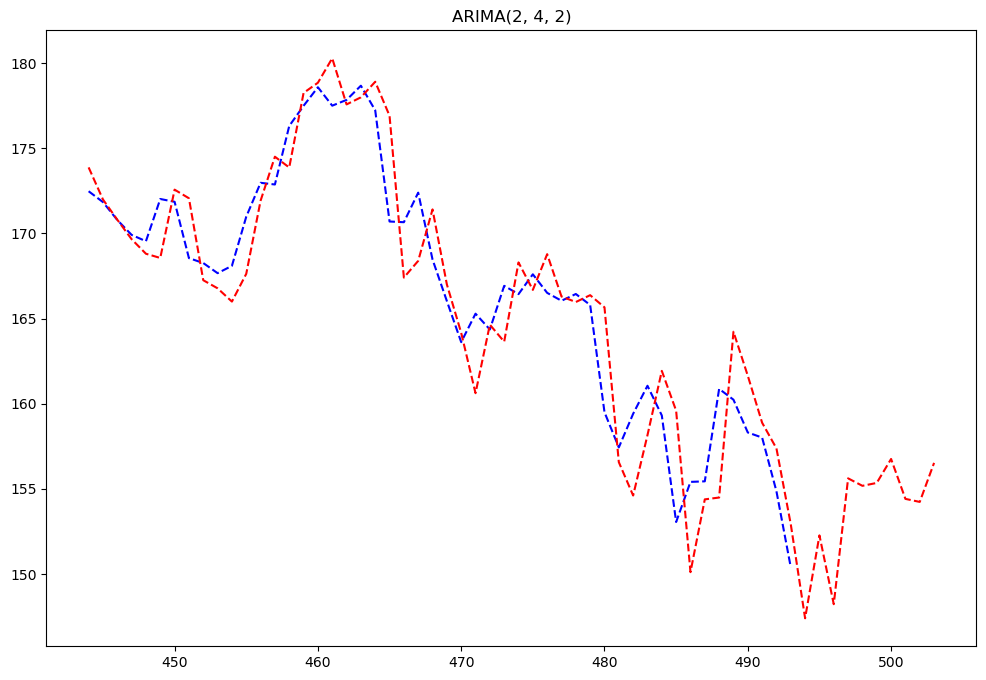

[[1, 0, 1, 2255.6403833175327], [1, 1, 1, 2246.4353265633226], [1, 2, 1, 2248.5948484807873], [1, 3, 1, 2423.594742129453], [1, 4, 1, 2789.4174002081263], [1, 0, 2, 2257.3054515192453], [1, 1, 2, 2248.4082909242456], [1, 2, 2, 2250.582928505406], [1, 3, 2, 2270.7787960653113], [1, 4, 2, 2449.1923439940356], [2, 0, 1, 2257.323189406816], [2, 1, 1, 2248.4291678139152], [2, 2, 1, 2250.5753542458497], [2, 3, 1, 2382.23489491031], [2, 4, 1, 2658.666115704161], [2, 0, 2, 2259.2930358787244], [2, 1, 2, 2232.2868671941624], [2, 2, 2, 2247.8710994033363], [2, 3, 2, 2272.2076309413333], [2, 4, 2, 2415.3339243891955]]


In [26]:
import statsmodels.api as sm  # 导入StatsModels库


# 复制数据的一个子集，通常选择500行以内的数据
data_df = data.iloc[2:500].copy()

# 用于存储AIC值的列表
aicVal = []
# 循环遍历不同的ARIMA模型参数
for ari in range(1, 3):  # AR阶数（1到2）
    for maj in range(1, 3):  # MA阶数（1到2）
        for d in range(0, 5):  # 差分阶数（0到4）
            try:
                # 使用ARIMA模型拟合数据
                arma_obj = sm.tsa.arima.ARIMA(data_df.High, order=(ari, d, maj)).fit(method='innovations_mle')

                # 预测未来10个时间步的数据
                data_df['ARIMA'] = arma_obj.predict(end=len(data_df) + 10)

                # 打印AIC值
                print(arma_obj.aic)

                # 创建一个图形窗口
                f, axarr = plt.subplots(1, sharex=True)
                f.set_size_inches(12, 8)

                # 绘制原始数据和ARIMA模型拟合的数据
                data_df['High'].iloc[len(data_df) - 60: -10].plot(color='b', linestyle='--', ax=axarr)
                data_df['ARIMA'].iloc[len(data_df) - 60:].plot(color='r', linestyle='--', ax=axarr)

                # 设置图表标题
                axarr.set_title('ARIMA(%d, %d, %d)' % (ari, d, maj))

                # 显示图表
                plt.show()

                # 将模型参数和AIC值添加到列表中
                aicVal.append([ari, d, maj, arma_obj.aic])

            except Exception as e:
                print(e)

# 打印AIC值列表
print(aicVal)


1. **参数组合选择：** 尝试了不同的自回归阶数（p）、差分阶数（d）和移动平均阶数（q）的组合，共计20个不同的参数组合。这是一个良好的实践，因为ARIMA模型的性能通常依赖于正确选择这些参数。

2. **AIC值比较：** 数据中列出了每个参数组合对应的AIC值。AIC是一种模型选择标准，它考虑了模型的拟合能力和复杂性。根据AIC值，可以选择具有最低AIC值的模型。在数据中，最低的AIC值是2232.2868671941624，对应于参数组合 `[2, 1, 2]`。

3. **差分阶数（d）的影响：** 通过观察不同差分阶数下的AIC值，可以看出随着差分阶数的增加，AIC值逐渐下降。这可能表示对数据进行一次差分（d=1）可以使数据变得更平稳，但增加更多的差分可能会引入过多的噪声，导致模型过于复杂。

4. **自回归阶数（p）和移动平均阶数（q）的选择：** 在具有最低AIC值的参数组合 `[2, 1, 2]` 中，p=2表示模型考虑了过去两个时间步的自回归效应，q=2表示模型考虑了过去两个时间步的移动平均效应。这些值是通过AIC值比较选择的。

5. **模型选择：** 基于AIC值的比较，最佳模型似乎是ARIMA(2,1,2)。这个模型在拟合数据和模型复杂性之间取得了平衡，可能是最适合数据的模型。

6. **进一步评估：** 一旦选择了最佳模型，可以进行进一步的评估，包括检查模型的残差是否具有自相关性、模型的预测准确性等。这些评估可以帮助确定模型是否满足要求。

7. **p（自回归阶数）的增大：**
   - 当p增大时，模型考虑了更多的过去时间步的自回归效应。这意味着模型更依赖于过去的观测值来进行预测。较高的p值可以捕捉到更长期的趋势和周期性。
   - 增加p可能会增加模型的复杂性，特别是在数据中存在噪声或随机性的情况下。如果p过大，可能会导致模型过拟合。

8. **q（移动平均阶数）的增大：**
   - 当q增大时，模型考虑了更多的过去时间步的移动平均效应。这意味着模型更依赖于过去的模型误差来进行预测。较高的q值可以帮助捕捉更多的短期波动。
   - 增加q可能会增加模型的复杂性，尤其是在数据中存在大幅波动的情况下。如果q过大，可能会导致模型过于敏感，对噪声过度拟合。

9. **d（差分阶数）的增大：**
   - 差分阶数d表示对原始时间序列进行的差分操作的次数。当d增大时，模型会应用更多次的差分操作，以使数据变得平稳。
   - 增加d通常用于处理非平稳时间序列，但过高的d值可能会导致数据过度平稳化，丧失了原始数据的信息。

综上所述，根据AIC值的比较，ARIMA(2,1,2)模型似乎是最佳的模型选择。但最终的决策应该基于对数据和建模目标的更深入了解以及进一步的模型评估。 ARIMA模型通常需要不断调整和改进，以获得最佳性能。
# ARIMA模型实验结果

C:\Users\zx131\AppData\Local\Temp\ipykernel_22296\1808959459.py:2: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  arma_obj = sm.tsa.arima.ARIMA(data_df.High, order=(2, 1, 2)).fit(method='innovations_mle')


2232.2868671941624


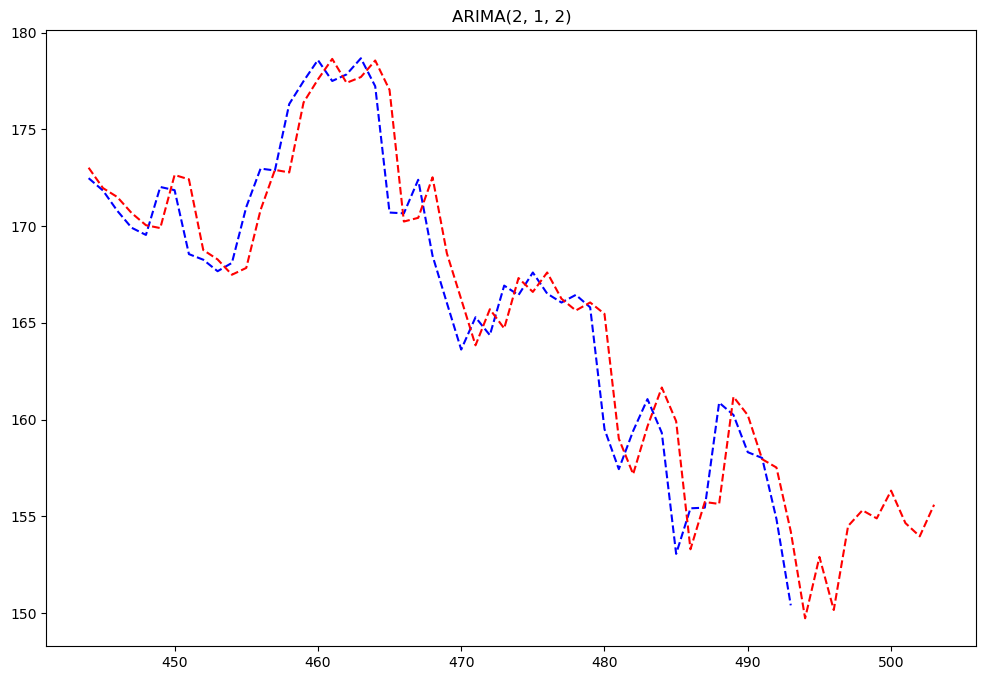

In [27]:
# 使用ARIMA(2, 1, 2)模型拟合数据
arma_obj = sm.tsa.arima.ARIMA(data_df.High, order=(2, 1, 2)).fit(method='innovations_mle')

# 预测未来10个时间步的数据
data_df['ARIMA'] = arma_obj.predict(end=len(data_df) + 10)

# 打印AIC值
print(arma_obj.aic)

# 创建一个图形窗口
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(12, 8)

# 绘制原始数据和ARIMA(2, 1, 2)模型拟合的数据
data_df['High'].iloc[len(data_df) - 60: -10].plot(color='b', linestyle='--', ax=axarr)
data_df['ARIMA'].iloc[len(data_df) - 60:].plot(color='r', linestyle='--', ax=axarr)

# 设置图表标题
axarr.set_title('ARIMA(2, 1, 2)')

# 显示图表
plt.show()


# 对比AR、MA、ARMA、ARIMA
对比之前实验，ARMA、MA、ARIMA模型均体现出了优秀的模型性能
但AR模型效果较差。
查阅资料后总结各个模型特点以及优缺点如下
1. **AR（自回归）模型**：
   - 特点：AR模型基于过去时间步的观测值来预测未来值，具有自相关性。
   - 适用场景：适用于时间序列数据中存在明显自相关性的情况，例如具有明显趋势或季节性的数据。
   - 效果：对于具有自相关性的数据，AR模型可以提供较好的拟合效果，但可能忽略了数据中的噪声成分。

2. **MA（移动平均）模型**：
   - 特点：MA模型基于过去时间步的模型误差来预测未来值，具有平滑噪声的能力。
   - 适用场景：适用于时间序列数据中存在明显的噪声成分的情况，可以有效平滑随机波动。
   - 效果：对于具有明显噪声成分的数据，MA模型可以提供较好的噪声抑制效果，但可能无法捕捉趋势和周期性。

3. **ARMA（自回归移动平均）模型**：
   - 特点：ARMA模型结合了AR和MA模型的特点，同时考虑了自相关性和噪声成分。
   - 适用场景：适用于时间序列数据中既有自相关性又有噪声成分的情况，可以综合考虑两者。
   - 效果：ARMA模型通常能够更好地拟合数据，因为它同时处理了自相关性和噪声，但需要选择合适的AR和MA阶数。

4. **ARIMA（差分自回归移动平均）模型**：
   - 特点：ARIMA模型在ARMA模型的基础上引入了差分操作，用于处理非平稳数据。
   - 适用场景：适用于时间序列数据中存在趋势或季节性的情况，需要进行差分以使数据平稳。
   - 效果：ARIMA模型在处理非平稳数据时非常有效，可以同时捕捉自相关性、噪声和趋势。

